In [1]:
# Import used libraries
library(PeakSegOptimal)
library(PeakSegDP)
library(microbenchmark)
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'PeakSegDP'

The following object is masked from 'package:PeakSegOptimal':

    PoissonLoss



In [2]:
# Initialize n_seq (different values of n to test with)
n_seq = c(10, 100, 1000, 10000)
# Declare a vector to store the runtime data in each loop iteration for each algorithm
cdpa_data <- integer(length(n_seq))
pdpa_data <- integer(length(n_seq))

In [3]:
# Loop through the different values of input N and compute the benchmark in each iteration
for (i in seq(1, length(n_seq))){
  # GeneratePoisson distribution 
  x <- rpois(n_seq[i], 10)
  # Benchmark both the PeakSegPDPA and cDPA functions with maxSegments = 3  
  m <- summary(microbenchmark( PeakSegPDPA(x, rep(1, length(x)), 3L),cDPA(x, rep(1, length(x)), 3L)))
  pdpa_data[i] <- m$mean[1]
  cdpa_data[i] <- m$mean[2]
}

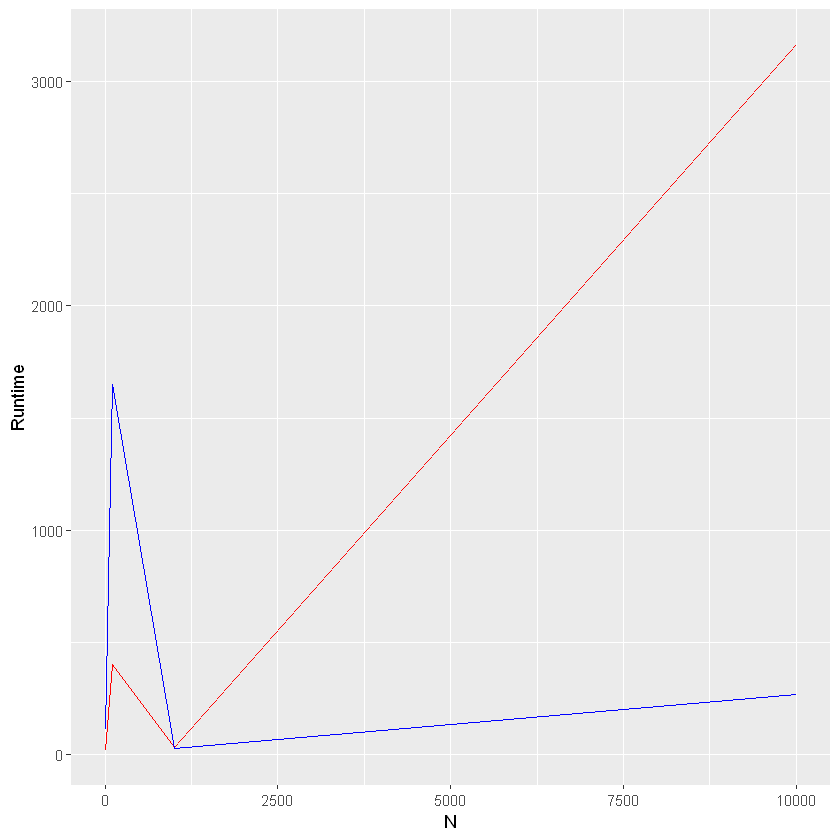

In [4]:
# Create a dateframe from the computed data
df = data.frame(pdpa_data, cdpa_data, n_seq)

# Plot cDPA vs N(red)    and    PeakSegPDPA vs N(blue)
ggplot(df, aes(x=n_seq, y=cdpa_data)) + geom_line(color = 'red') + geom_line(y = pdpa_data, color='blue') + labs(x="N", y="Runtime") 
